# Machine learning and RNA PolII distribution of foci

## Mariamawit Ashenafi



## Introduction

RNA PolII: Enzyme implicated in gene expression 


# Wetlab methods

- Nuclei isolation and conservation
    - Extract nuclei from Arabidopsis leaves
    - Gel embedding of nuclei on slides
- Immunostaining - antibodies (add links)
    - RNA PolII NP :
    - RNA PolII Ser5P :
    - RNA PolII Ser2P :
    - DNA : stained in DAPI 
- Image acquisition _STED microscopy
    - Objectif: 63 Glycerol
    -  



# Is there a distribution pattern of the foci?

- In regards to DNA amount 
- In regards to chromocenters, nucleolus and nucleus center of mass(approximation to periphery)
- In regards to other RNA PolII foci

## Image processing 

(Plugins are developped in python to collect features from 3D images and export them in .csv files)

1. List plugins and their description  
2. 

### Features
(.csv files are then processed in R to manage the data better)

1. Features : 
2. Label : 

In [1]:
### python packages required
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
style.use('seaborn-white')
from sklearn import metrics
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import ensemble, preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
### make plot appear inline
% matplotlib inline

C:\Users\Pheonix\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Getting the data

- The .csv files resulting from RNA PolII Data processing jupyter notebook are in 5 different folders.
- R was used for that module for specific packages that allow quick 3D distance calculation 
- However R has RAM issues when allocating to a vector or a matrix, so 5 folders are processed seperately and saved
- To read, and merge the heavy data and do machine learning, we use python

## Merge MLResult_Segmented

.... Read one table to check format

In [10]:
#FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/1/MLResult_Segmented.csv"
FilePath = "Z:\\Result0309\\s20_Wt\\1\\MLResult_Segmented.csv"
features = pd.read_csv(FilePath)

In [15]:
features.iloc[0:5,]

,SpotId,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,...,Sp3NumbSpot,NucleusCMDist,NucleolusCMDist,MeanCCDist,ClosestCCCMDist,VolumeCC,IntensityCh0CC,IntensityCh1CC,IntensityCh2CC,IntensityCh3CC
0,1,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,0.141626,...,-1.067364,1.368976,1.335282,1.437601,NaN,-1.167055,0.922805,1.209323,1.221455,-0.541304
1,2,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.368976,1.335282,1.437601,NaN,-1.167055,0.922805,1.209323,1.221455,-0.541304
2,3,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,0.012142,...,-1.067364,1.368976,1.335282,1.437601,NaN,-1.167055,0.922805,1.209323,1.221455,-0.541304
3,4,1,s20_wt_aa_series005.ims,0.180854,0.180854,0.180854,NaN,NaN,NaN,0.017757,...,-1.067364,1.368976,1.335282,1.437601,NaN,-1.167055,0.922805,1.209323,1.221455,-0.541304
4,5,1,s20_wt_aa_series005.ims,0.147949,0.147949,0.147949,NaN,NaN,NaN,0.094566,...,-0.138348,1.368976,1.335282,1.437601,NaN,-1.167055,0.922805,1.209323,1.221455,-0.541304


... read results from all 5 folders and merge

In [24]:
#del features
Result=pd.DataFrame()
isLinux=False
FileSeperator="/" if isLinux else "\\"
#MotherFolder= "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt"#for linux
MotherFolder= "Z:\\Result0309\\s20_Wt"#for windows
for p in range(1,5):
    FilePath = FileSeperator.join(map(str, [MotherFolder, str(p), "MLResult_Segmented.csv"])) 
    features = pd.read_csv(FilePath)
    Result=Result.append(features)
del features

In [25]:
print(Result.shape)
print (Result.columns)

(542412, 51)
Index([u'SpotId', u'FociType', u'File', u'Sp1MeanDist', u'Sp1MinDist',
       u'Sp1MaxDist', u'Sp2MeanDist', u'Sp2MinDist', u'Sp2MaxDist',
       u'Sp3MeanDist', u'Sp3MinDist', u'Sp3MaxDist', u'N1Volume',
       u'N1IntensityCh0', u'N1IntensityCh1', u'N1IntensityCh2',
       u'N1IntensityCh3', u'N2Volume', u'N2IntensityCh0', u'N2IntensityCh1',
       u'N2IntensityCh2', u'N2IntensityCh3', u'IntensityCh0', u'IntensityCh1',
       u'IntensityCh2', u'IntensityCh3', u'SegmentChannel',
       u'Nucleus_NumbSpot', u'Nucleus_MeanDist', u'Nucleus_MinDist',
       u'Nucleus_MaxDist', u'Chromocenters_NumbSpot',
       u'Chromocenters_MeanDist', u'Chromocenters_MinDist',
       u'Chromocenters_MaxDist', u'Nucleolus_NumbSpot', u'Nucleolus_MeanDist',
       u'Nucleolus_MinDist', u'Nucleolus_MaxDist', u'Sp1NumbSpot',
       u'Sp2NumbSpot', u'Sp3NumbSpot', u'NucleusCMDist', u'NucleolusCMDist',
       u'MeanCCDist', u'ClosestCCCMDist', u'VolumeCC', u'IntensityCh0CC',
       u'IntensityCh1C

... save intermediate df

In [26]:
FilePath = FileSeperator.join(map(str, [MotherFolder, "MLResultObs.csv"])) 
Result.to_csv(FilePath, index=False)

## Merge MLResult_Simulated

In [27]:
#del features
ResultSim=pd.DataFrame()
isLinux=False
FileSeperator="/" if isLinux else "\\"
#MotherFolder= "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt"#for linux
MotherFolder= "Z:\\Result0309\\s20_Wt"#for windows
for p in range(1,5):
    FilePath = FileSeperator.join(map(str, [MotherFolder, str(p), "MLResult_Simulated.csv"])) 
    features = pd.read_csv(FilePath)
    ResultSim=ResultSim.append(features)
del features

... save intermediate df

In [28]:
print(ResultSim.shape)

(1020000, 51)


In [29]:
FilePath = FileSeperator.join(map(str, [MotherFolder, "MLResultSim.csv"])) 
ResultSim.to_csv(FilePath, index=False)

## Merge observed and simulated data

In [30]:
ResultFinal=Result.append(ResultSim)

In [31]:
print(ResultFinal.shape)

(1562412, 51)


In [32]:
del Result,ResultSim

In [34]:
ResultFinal.to_csv("Z:/Result0309/s20_Wt/MLResultR.csv")

In [37]:
Result=ResultFinal.copy()
del ResultFinal

... or read saved file

In [2]:
#FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/MLResultR.csv"# for linux
FilePath = "Z:/Result0309/s20_Wt/MLResultR.csv"# for windows
Result = pd.read_csv(FilePath)

## Feature normalization

1. Distances, intensities and CC volumes have already been scaled per image
2. Nucleus and and nucleolus features though have not been scaled yet 
3. Plot data and see if Log transforming the features is necessary

In [3]:
#del features
Result=Result.drop("Unnamed: 0", axis=1)#after reading file
Result.columns

##### Scale nucleus and nuclei features 
(Other columns have already been scaled in RNA PolII Data Processing jupyter notebook)

In [4]:
ColumnsToScale = [u'N1IntensityCh0',
       u'N1IntensityCh1', u'N1IntensityCh2', u'N1IntensityCh3', u'N1Volume',
       u'N2IntensityCh0', u'N2IntensityCh1', u'N2IntensityCh2',
       u'N2IntensityCh3', u'N2Volume']
newdf = pd.DataFrame(preprocessing.scale(Result[ColumnsToScale]), index=Result.index, columns=ColumnsToScale)
newdf1 = Result.drop(ColumnsToScale, 1)
newdf = pd.concat([newdf1, newdf], axis=1)
del newdf1
newdf.head()

,SpotId,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,...,N1IntensityCh0,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume
0,1,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,0.141626,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794
1,2,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794
2,3,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,0.012142,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794
3,4,1,s20_wt_aa_series005.ims,0.180854,0.180854,0.180854,NaN,NaN,NaN,0.017757,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794
4,5,1,s20_wt_aa_series005.ims,0.147949,0.147949,0.147949,NaN,NaN,NaN,0.094566,...,0.891249,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794


## Visualise features
0. Drop SpotId = don't need that column
1. For visualisation : drop Categorical columns : FociType, File

In [5]:
#remove SpotId column
newdf=newdf.drop("SpotId", axis=1)

Text(0.5,1,u'Scaled numerical data')

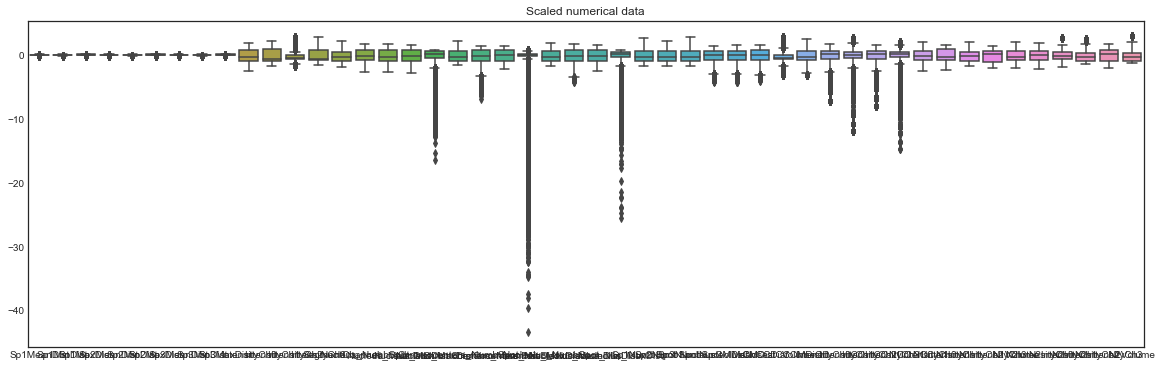

In [6]:
#Boxplot feature before removing outliers
test=newdf.drop(["FociType", "File"], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
sns.boxplot(data=test)
plt.title("Scaled numerical data")

## Add ploidy index

In [7]:
FilePath = "Z:/Result0309/s20_Wt/XTNucleiPloidy_Result/XTNucleiPloidy_Result.csv"# for windows
#FilePath = "/home/nani/smb4k/BOTSERV4.UZH.CH/gr_ug_ext/mashen2/Result0309/s20_Wt/XTNucleiPloidy_Result/XTNucleiPloidy_Result.csv"# for linux
Ploidy = pd.read_csv(FilePath)
Ploidy.head()

,ClusterId,FileName,MeanIntensity,SumIntensity,Volume
0,P0,s20_wt_aa_series005.ims,27.313093,262055504.0,306.573273
1,P0,s20_wt_ab_series006.ims,23.910700,164479776.0,219.863632
2,P0,s20_wt_ac_series007.ims,31.358595,91467160.0,93.077141
3,P0,s20_wt_ad_series008.ims,42.793816,230455280.0,172.106857
4,P0,s20_wt_ae_series009.ims,40.791016,316271360.0,247.735687


In [8]:
Ploidy=Ploidy[["ClusterId", "FileName"]]
newdf = newdf.join(Ploidy.set_index('FileName'), on='File')
newdf.head()

,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,Sp3MinDist,...,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume,ClusterId
0,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,0.141626,0.141626,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,P0
1,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,P0
2,1,s20_wt_aa_series005.ims,NaN,NaN,NaN,NaN,NaN,NaN,0.012142,0.012142,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,P0
3,1,s20_wt_aa_series005.ims,0.180854,0.180854,0.180854,NaN,NaN,NaN,0.017757,0.017757,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,P0
4,1,s20_wt_aa_series005.ims,0.147949,0.147949,0.147949,NaN,NaN,NaN,0.094566,0.006933,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,P0


## Manage missing data

1. Factorise categorical columns
2. In NumbSpot column NaN means there wasn't a neigbouring point inside 0.2 radius = replace NaN with 0
3. MeanDist, MinDist, MaxDist : NaN in these columns if there is no neibouring point = replace values with 10 (scaled values only go up to 3)

In [9]:
lab=newdf["FociType"].values
pd.factorize(lab)[0]

array([0, 0, 0, ..., 5, 5, 5], dtype=int64)

In [10]:
newdf.columns

Index([              u'FociType',                   u'File',
                  u'Sp1MeanDist',             u'Sp1MinDist',
                   u'Sp1MaxDist',            u'Sp2MeanDist',
                   u'Sp2MinDist',             u'Sp2MaxDist',
                  u'Sp3MeanDist',             u'Sp3MinDist',
                   u'Sp3MaxDist',           u'IntensityCh0',
                 u'IntensityCh1',           u'IntensityCh2',
                 u'IntensityCh3',         u'SegmentChannel',
             u'Nucleus_NumbSpot',       u'Nucleus_MeanDist',
              u'Nucleus_MinDist',        u'Nucleus_MaxDist',
       u'Chromocenters_NumbSpot', u'Chromocenters_MeanDist',
        u'Chromocenters_MinDist',  u'Chromocenters_MaxDist',
           u'Nucleolus_NumbSpot',     u'Nucleolus_MeanDist',
            u'Nucleolus_MinDist',      u'Nucleolus_MaxDist',
                  u'Sp1NumbSpot',            u'Sp2NumbSpot',
                  u'Sp3NumbSpot',          u'NucleusCMDist',
              u'Nucleolu

In [11]:
FactorColumns=["FociType", "File", "ClusterId"]
for c in FactorColumns:
    newdf[c] = pd.factorize(newdf[c])[0]
for c in ["Sp1NumbSpot", "Sp2NumbSpot", "Sp3NumbSpot", "Nucleolus_NumbSpot", "Nucleus_NumbSpot", "Chromocenters_NumbSpot"]:
    newdf[c] = newdf[c].fillna(0)
for c in ["Sp1MeanDist", "Sp1MinDist", "Sp1MaxDist", 
          "Sp2MeanDist", "Sp2MinDist", "Sp2MaxDist", 
          "Sp3MeanDist", "Sp3MinDist", "Sp3MaxDist", 
          "Nucleolus_MeanDist", "Nucleolus_MinDist", "Nucleolus_MaxDist",
          "Nucleus_MeanDist", "Nucleus_MinDist", "Nucleus_MaxDist",
          "Chromocenters_MeanDist", "Chromocenters_MinDist", "Chromocenters_MaxDist"]:
    newdf[c] = newdf[c].fillna(10) 
#Replace other NaN by 0
newdf=newdf.fillna(0)    
newdf.head()

,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,Sp3MinDist,...,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume,ClusterId
0,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,0.141626,0.141626,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0
1,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.000000,10.000000,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0
2,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,0.012142,0.012142,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0
3,0,0,0.180854,0.180854,0.180854,10.0,10.0,10.0,0.017757,0.017757,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0
4,0,0,0.147949,0.147949,0.147949,10.0,10.0,10.0,0.094566,0.006933,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0


## Predict FociType column
*** General data ***

*** RandomForestClassifier ***

In [48]:
#FociType label for simulated data
a=newdf.loc[newdf['SegmentChannel']==0, "FociType"]
pd.Categorical(a)

[3, 3, 3, 3, 3, ..., 5, 5, 5, 5, 5]
Length: 1020000
Categories (3, int64): [3, 4, 5]

In [49]:
#Seperate features and labels and put them in arrays
features = newdf.drop(['FociType','File', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab = features.columns
features = features.values
labels = newdf["FociType"].values

In [50]:
##Random Forest classifer
rf = ensemble.RandomForestClassifier(n_estimators=101)
prediction = cross_validation.cross_val_predict(rf, features, labels)

### Check classifier result

In [54]:
COLORS = np.array([
    '#7fc97f',
    '#beaed4',
    '#fdc086',
    '#ffff99',
    '#386cb0',
    '#f0027f',
    '#bf5b17',
    '#666666',
    '#666006',
    '#7f007f'
])

Accuracy for all:
0.366366873782
Accuracy for observed data:
0.724535961594
Accuracy for simulated data:
0.175900980392


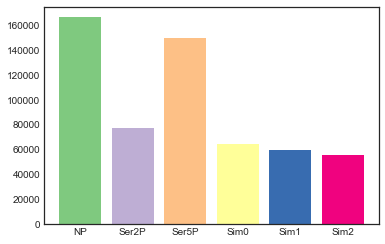

In [55]:
Pred=newdf.copy()
Pred["RdForestT"]=prediction == labels
print("Accuracy for all:")
print(metrics.accuracy_score(labels, prediction))
print("Accuracy for observed data:")
Obs=Pred.loc[Pred["SegmentChannel"]!=0, "RdForestT"]
print(Obs.values.mean())
print("Accuracy for simulated data:")
Obs=Pred.loc[Pred["SegmentChannel"]==0, "RdForestT"]
print(Obs.values.mean())
res = prediction == labels
Sp1=res[labels == 0].sum()
Sp2=res[labels == 1].sum()
Sp3=res[labels == 2].sum()
Sp4=res[labels == 3].sum()
Sp5=res[labels == 4].sum()
Sp6=res[labels == 5].sum()
DiffList=[Sp1, Sp2, Sp3, Sp4, Sp5, Sp6]
xLab=["0","NP", "Ser2P", "Ser5P"]+ ["Sim"+str(i) for i in range(3)]
fig,ax = plt.subplots()
plt.bar(range(6), DiffList, align="center", color= COLORS)
#ax.set_xticks(range(6))
ax.set_xticklabels(xLab)
plt.show()

In [ ]:
del Pred

### Fine tune classifier parameters
1. Fine tune number of trees in terms of accuracy 
2. Set scoring ="f1_weighted", because I have different number of foci for each foci type, this can explain why I get higher accuracy for Ser5P compared to the others  = I need to compensate for unbalanced data. I want to see which number to tree does that best.
3. Train classifiers on portion of segmented spots and test it on left out portion on segmented and on simulated data
4. Split train and test set preserving foci proportion
5. Segmentchannel = intensity in segmented channel, however in data processing pipeline scaled the numeric data after I created this column. It could be that there is signal difference between antibodies. So create a column with same information after scaling

Weighted: Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label). 


...Transform SegmentChannel column from df

In [12]:
newdf["SegmentChannel"]=0 #for simulated data
newdf.loc[newdf["FociType"]==0,"SegmentChannel"] =newdf.loc[newdf["FociType"]==0,'IntensityCh1'] # NP intensity
newdf.loc[newdf["FociType"]==1,"SegmentChannel"] =newdf.loc[newdf["FociType"]==1,'IntensityCh2'] # Ser2P intensity
newdf.loc[newdf["FociType"]==2,"SegmentChannel"] =newdf.loc[newdf["FociType"]==2,'IntensityCh3'] # Ser5P intensity

In [13]:
newdf.iloc[0:5,]

,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,Sp3MinDist,...,N1IntensityCh1,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume,ClusterId
0,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,0.141626,0.141626,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0
1,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.000000,10.000000,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0
2,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,0.012142,0.012142,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0
3,0,0,0.180854,0.180854,0.180854,10.0,10.0,10.0,0.017757,0.017757,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0
4,0,0,0.147949,0.147949,0.147949,10.0,10.0,10.0,0.094566,0.006933,...,-0.60571,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0


...Seperate segmented and simulated data

In [14]:
SimulatedData = newdf.loc[newdf["SegmentChannel"]==0,]
SegmentedData = newdf.loc[newdf["SegmentChannel"]!=0,]
print(SimulatedData.shape)
print(SegmentedData.shape)

(1020000, 51)
(542412, 51)


...Prepare train set and data set

In [15]:
labels  = SegmentedData["FociType"].values
TrainSet,TestSet = train_test_split(SegmentedData,stratify=labels, test_size=0.3, random_state=20012017)
features= TrainSet.drop(['FociType','File', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab     = features.columns
features= features.values
labels  = TrainSet["FociType"].values
print(TrainSet.shape)
print(TestSet.shape)

(379688, 51)
(162724, 51)


In [120]:
F1Score=[]
Accuracy=[]
for nbreTree in range(10,140,10):
    rf = ensemble.RandomForestClassifier(n_estimators=nbreTree)
    GetF1 = cross_validation.cross_val_score(rf, features, labels, cv=10, scoring="f1_weighted")
    F1Score.append(GetF1)
    print(nbreTree)

10
20
30
40
50
60
70
80
90
100
110
120
130


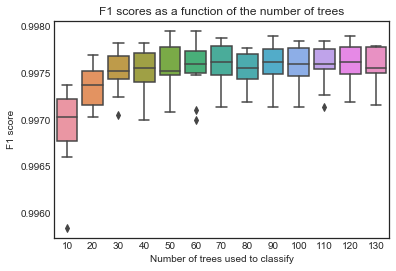

In [121]:
sns.boxplot(range(10,140,10), F1Score)
plt.xlabel("Number of trees used to classify")
plt.ylabel("F1 score")
plt.title("F1 scores as a function of the number of trees")
plt.show()

...F1 score, doesn't seem to improve after 30 trees ...40 to be safe 

In [65]:
Accuracy=[]
for nbreTree in range(40,100,10):
    rf = ensemble.RandomForestClassifier(n_estimators=nbreTree)
    GetScore = cross_validation.cross_val_score(rf, features, labels, cv=10)
    Accuracy.append(GetScore)
    print(nbreTree)

40
50
60
70
80
90


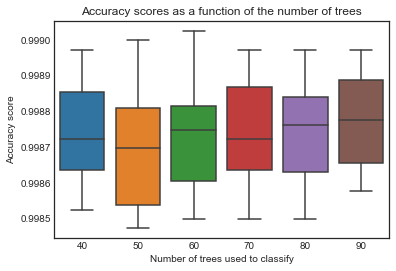

In [66]:
sns.boxplot(range(40,100,10), Accuracy)
plt.xlabel("Number of trees used to classify")
plt.ylabel("Accuracy score")
plt.title("Accuracy scores as a function of the number of trees")
plt.show()

...Accuracy, doesn't seem to improve after 40 either. 

***Number of tree = 40, Accuracy =0.99***
### Use new parameters to create classifiers

In [23]:
rf= ensemble.RandomForestClassifier(n_estimators=40)
rf.fit(features,labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predict test data with new classifer

In [24]:
PredFoci=rf.predict(TestSet[Lab])

In [25]:
FociNames=["NP", "Ser2P", "Ser5P"]
predFociRealLab = [FociNames[y] for y in PredFoci]
ObserRealLab=[FociNames[y] for y in TestSet["FociType"].values]
print(predFociRealLab [0:6])
print(ObserRealLab [0:6])

['Ser2P', 'Ser2P', 'NP', 'NP', 'Ser2P', 'Ser5P']
['Ser2P', 'Ser2P', 'NP', 'NP', 'Ser2P', 'Ser5P']


In [26]:
pd.crosstab(np.array(ObserRealLab), np.array(predFociRealLab), rownames=['Actual Foci'], colnames=['Predicted Foci'])

Predicted Foci,NP,Ser2P,Ser5P
Actual Foci,,,
NP,50729,5,61
Ser2P,361,34607,164
Ser5P,49,131,76617


In [27]:
print("Accuracy score:")
print(metrics.accuracy_score(TestSet["FociType"].values, PredFoci))

Accuracy score:
0.995261915882


### Add simulated data in test data 
***How are the simulated spots classified?***

In [155]:
TestWSim=TestSet.append(SimulatedData)
PredSim=rf.predict(TestWSim[Lab])

In [156]:
FociNames=["NP", "Ser2P", "Ser5P", "Sim"]
predSimLab = [FociNames[y] for y in PredSim]
RealLabel = TestSet["FociType"].values.tolist()+np.repeat(3, len(SimulatedData)).tolist()
ObserSimLab=[FociNames[y] for y in np.array(RealLabel)]
print(predSimLab [0:6])
print(ObserSimLab [0:6])
print("Accuracy score:")
print(metrics.accuracy_score(TestWSim["FociType"].values, PredSim))
pd.crosstab(np.array(ObserSimLab), np.array(predSimLab), rownames=['Actual Sim data'], colnames=['Predicted Sim data'])


['Ser2P', 'Ser2P', 'NP', 'NP', 'Ser2P', 'Ser5P']
['Ser2P', 'Ser2P', 'NP', 'NP', 'Ser2P', 'Ser5P']
Accuracy score:
0.136841731461


Predicted Sim data,NP,Ser2P,Ser5P
Actual Sim data,,,
NP,50699,7,89
Ser2P,410,34550,172
Ser5P,43,157,76597
Sim,31130,456190,532680


### Understand classifer
#### Important features

In [157]:
Lab

Index([           u'Sp1MeanDist',             u'Sp1MinDist',
                   u'Sp1MaxDist',            u'Sp2MeanDist',
                   u'Sp2MinDist',             u'Sp2MaxDist',
                  u'Sp3MeanDist',             u'Sp3MinDist',
                   u'Sp3MaxDist',           u'IntensityCh0',
             u'Nucleus_NumbSpot',       u'Nucleus_MeanDist',
              u'Nucleus_MinDist',        u'Nucleus_MaxDist',
       u'Chromocenters_NumbSpot', u'Chromocenters_MeanDist',
        u'Chromocenters_MinDist',  u'Chromocenters_MaxDist',
           u'Nucleolus_NumbSpot',     u'Nucleolus_MeanDist',
            u'Nucleolus_MinDist',      u'Nucleolus_MaxDist',
                  u'Sp1NumbSpot',            u'Sp2NumbSpot',
                  u'Sp3NumbSpot',          u'NucleusCMDist',
              u'NucleolusCMDist',             u'MeanCCDist',
              u'ClosestCCCMDist',               u'VolumeCC',
               u'IntensityCh0CC',         u'IntensityCh1CC',
               u'Intensi

In [159]:
impFeatures=rf.feature_importances_

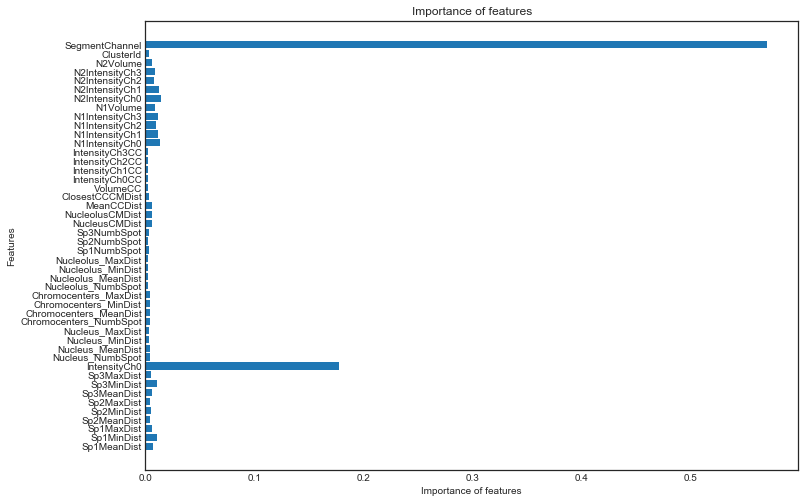

In [160]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features")
plt.show()

#### Visualise boxplot for important features

In [161]:
SelFeat = ["SegmentChannel", "IntensityCh0", "Sp3MinDist", "Sp1MinDist", "NucleusCMDist", "NucleolusCMDist", "MeanCCDist"]
Ylab = ["Immunostaining signal intensity", 
        "DAPI intensity", 
        "Distance to closest Ser5P foci",
        "Distance to closest NP foci", 
        "Distance to nucleus center of mass", 
        "Distance to nucleolus center of mass",
        "Distance to center of mass of all chromocenter"
       ]

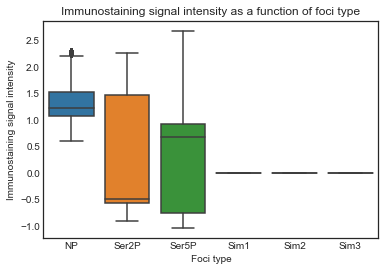

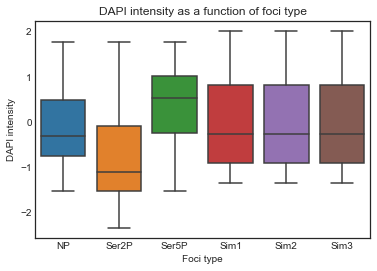

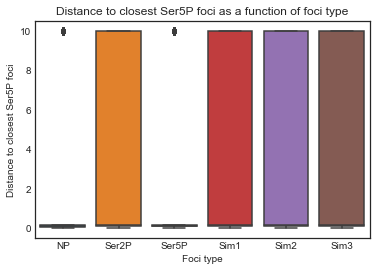

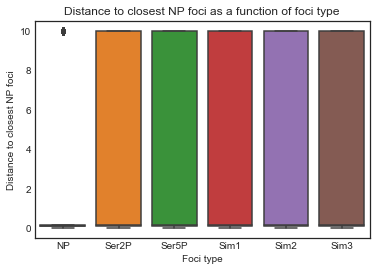

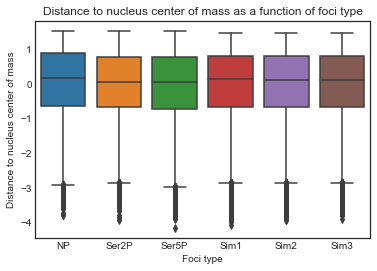

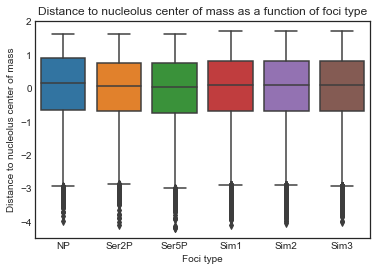

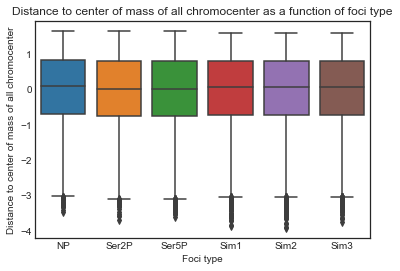

In [165]:
for feat, lab in zip(SelFeat, Ylab):
    fig, ax = plt.subplots()
    fig.set_size_inches(6,4)
    sns.boxplot(newdf["FociType"], newdf[feat])
    plt.xlabel("Foci type")
    ax.set_xticklabels(["NP", "Ser2P", "Ser5P","Sim1", "Sim2", "Sim3"])
    plt.ylabel(lab)
    plt.title(lab+" as a function of foci type")
    plt.show()

### Conclusion PolII distribution is not random - Part I
1. The intensities in NP spots are homogeneous compared to Ser2P and Ser5P
2. Ser2P is positioned at low DAPI intensity. Ser5P is positioned at high DAPI intensity. 
3. There is a higher number of Ser5P and NP spots positioned away from Ser5P than random or Ser2P spots
4. There is a higher number of NP spots positioned away from NPs than random, Ser5P, and Ser2P spots -> either lower number of NP than other spot types or clustering of NPs (there is also a cluster distance=0)
5. Distance to nucleus, nucleolus and chromocenter center of mass ... same between foci, but still this features along with intensities in nucleus and nucleolus help prediction. FociType = f(SegmentedChannel, Dapi Intensity) is dependant on these features.



#### Check intensities of each foci channel

In [28]:
#Count number of spots for each foci
tab = newdf.groupby(['File', 'FociType']).size()
tab=tab.unstack()
tab=pd.DataFrame(tab)

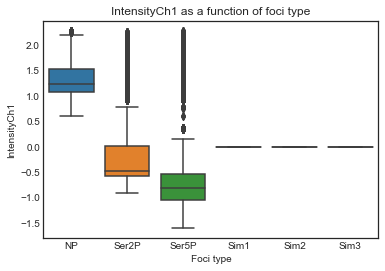

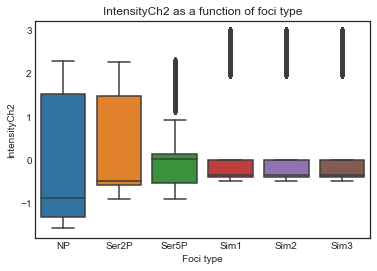

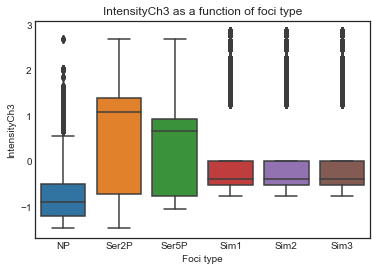

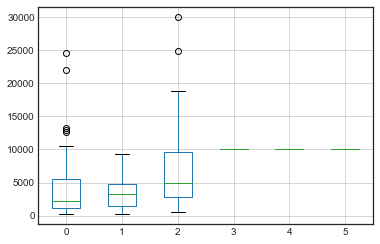

In [29]:
Ylab=["IntensityCh"+str(x) for x in range(1,4)]
for feat, lab in zip(range(1,4), Ylab):
    fig, ax = plt.subplots()
    fig.set_size_inches(6,4)
    sns.boxplot(newdf["FociType"], newdf["IntensityCh"+str(feat)])
    plt.xlabel("Foci type")
    ax.set_xticklabels(["NP", "Ser2P", "Ser5P","Sim1", "Sim2", "Sim3"])
    plt.ylabel(lab)
    plt.title(lab+" as a function of foci type")
    plt.show()
tab.boxplot()

### Conclusion PolII distribution is not random - Part II
6. NP intesnity: NP>>Sim>>Ser2P>>Ser5P ... few NP and clusterting of NP; 
    Ser2P intesnity: Ser2P==Ser5P==Sim>NP ...  high correlation Ser2+Ser5P; 
    Ser5P intesnity: Ser2P==Ser5P>Sim>NP ... clusterting of NP  and high correlation Ser2+Ser5P
7. Thereis not a lower NP foci than other Ser2P foci ... clustering of NP

## Predict distance to surfaces: nuclear periphery, nucleolus and chromocenters

In [16]:
newdf.columns

Index([              u'FociType',                   u'File',
                  u'Sp1MeanDist',             u'Sp1MinDist',
                   u'Sp1MaxDist',            u'Sp2MeanDist',
                   u'Sp2MinDist',             u'Sp2MaxDist',
                  u'Sp3MeanDist',             u'Sp3MinDist',
                   u'Sp3MaxDist',           u'IntensityCh0',
                 u'IntensityCh1',           u'IntensityCh2',
                 u'IntensityCh3',         u'SegmentChannel',
             u'Nucleus_NumbSpot',       u'Nucleus_MeanDist',
              u'Nucleus_MinDist',        u'Nucleus_MaxDist',
       u'Chromocenters_NumbSpot', u'Chromocenters_MeanDist',
        u'Chromocenters_MinDist',  u'Chromocenters_MaxDist',
           u'Nucleolus_NumbSpot',     u'Nucleolus_MeanDist',
            u'Nucleolus_MinDist',      u'Nucleolus_MaxDist',
                  u'Sp1NumbSpot',            u'Sp2NumbSpot',
                  u'Sp3NumbSpot',          u'NucleusCMDist',
              u'Nucleolu

... Create DistanceToSurface columns : contains distance to closest surface, or 10 if no close surface in a 0.2 um radius

In [22]:
newdf["DistanceToSurface"]=newdf["Nucleus_MinDist"]
newdf.loc[newdf["Nucleolus_MinDist"]<9,"DistanceToSurface"] =newdf.loc[newdf["Nucleolus_MinDist"]<9,'Nucleolus_MinDist']
newdf.loc[newdf["Chromocenters_MinDist"]<9,"DistanceToSurface"] =newdf.loc[newdf["Chromocenters_MinDist"]<9,'Chromocenters_MinDist']
newdf.iloc[0:5,]

,FociType,File,Sp1MeanDist,Sp1MinDist,Sp1MaxDist,Sp2MeanDist,Sp2MinDist,Sp2MaxDist,Sp3MeanDist,Sp3MinDist,...,N1IntensityCh2,N1IntensityCh3,N1Volume,N2IntensityCh0,N2IntensityCh1,N2IntensityCh2,N2IntensityCh3,N2Volume,ClusterId,DistanceToSurface
0,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,0.141626,0.141626,...,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0,-0.065766
1,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.000000,10.000000,...,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0,-1.575173
2,0,0,10.000000,10.000000,10.000000,10.0,10.0,10.0,0.012142,0.012142,...,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0,-1.908466
3,0,0,0.180854,0.180854,0.180854,10.0,10.0,10.0,0.017757,0.017757,...,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0,1.359124
4,0,0,0.147949,0.147949,0.147949,10.0,10.0,10.0,0.094566,0.006933,...,0.735665,-1.197396,0.183007,0.254529,-0.425106,0.58916,-1.173284,-0.885794,0,-1.773476


...
- Select DistanceToSurface <10, those within 0.2 um radius of a surface
- Take out all the other distance to surface columns
- Prepare train set and data set

In [55]:
SegmentedData = newdf.loc[newdf["Chromocenters_MinDist"]<10,]
SimulatedData = SegmentedData.loc[newdf["FociType"]>2,]
SegmentedData = SegmentedData.loc[newdf["FociType"]<3,]
print(SimulatedData.shape)
print(SegmentedData.shape)

(598008, 52)
(304779, 52)


In [56]:
labels  = SegmentedData["FociType"].values
TrainSet,TestSet = train_test_split(SegmentedData,stratify=labels, test_size=0.3, random_state=20012017)
features= TrainSet.drop(['File', 
                         'Nucleus_MinDist','Nucleus_MeanDist','Nucleus_MaxDist',
                         'Nucleolus_MinDist','Nucleolus_MeanDist','Nucleolus_MaxDist',
                         'Chromocenters_MinDist','Chromocenters_MeanDist','Chromocenters_MaxDist',
                         "Nucleolus_NumbSpot", "Nucleus_NumbSpot", "Chromocenters_NumbSpot",
                         'NucleolusCMDist','ClosestCCCMDist','NucleusCMDist',"MeanCCDist", "DistanceToSurface"],axis=1)    
Lab     = features.columns
features= features.values
labels  = TrainSet["Nucleolus_MinDist"].values
print(TrainSet.shape)
print(TestSet.shape)

(213345, 52)
(91434, 52)


In [ ]:
regr = ensemble.RandomForestRegressor(n_estimators=100, random_state=20012017)
regr.fit(features,labels)
impFeatures=regr.feature_importances_

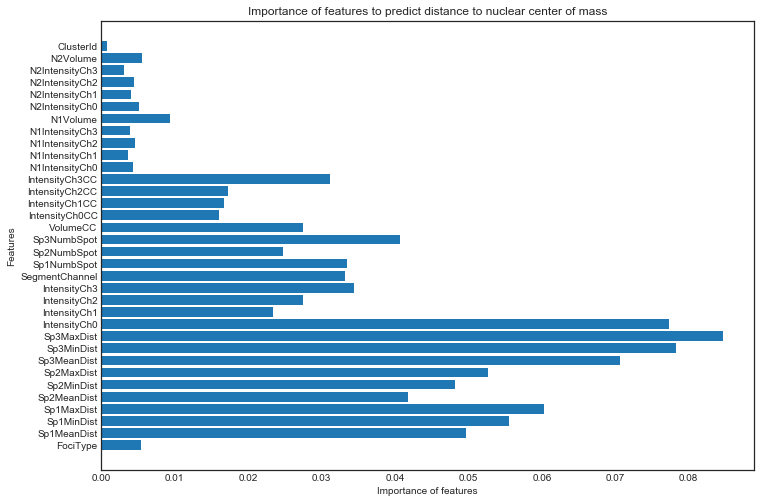

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features to predict distance to nuclear center of mass")
plt.show()

In [52]:
prediction=regr.predict(TestSet[Lab])

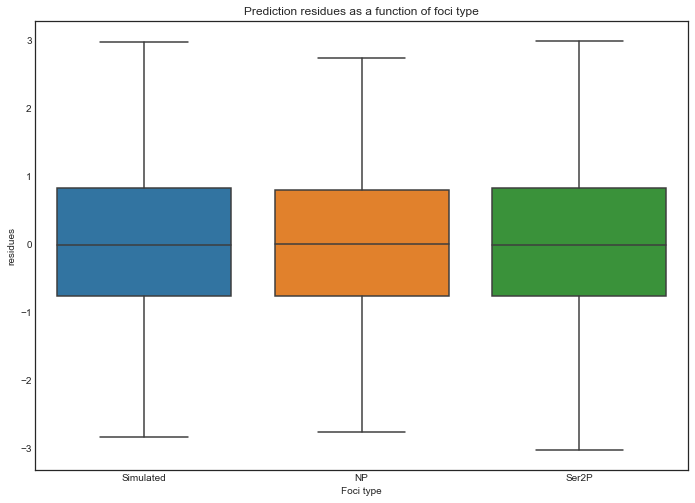

In [53]:
df=pd.DataFrame({"Lab":TestSet["DistanceToSurface"], "Pred":prediction})
df["res"] = df["Lab"].subtract(df["Pred"])
df["foci"] = newdf["FociType"]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(df["foci"], df["res"])
plt.xlabel("Foci type")
ax.set_xticklabels(["NP", "Ser2P", "Ser5P"])
plt.ylabel("residues")
plt.title("Prediction residues as a function of foci type")
plt.show()

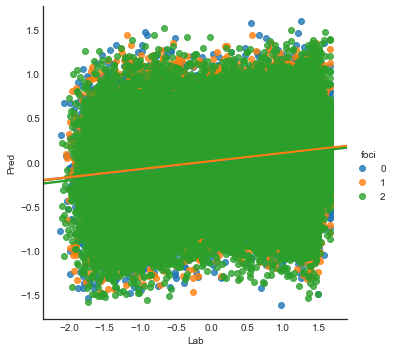

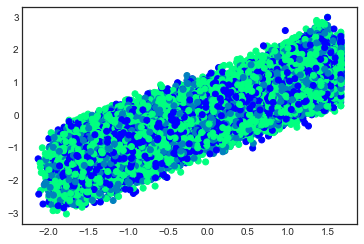

In [54]:

sns.lmplot("Lab","Pred",data=df, hue="foci")
fig, ax = plt.subplots()
ax.scatter(df["Lab"],df["res"], c=df["foci"], cmap="winter")
#sns.lmplot("Res","Lab",data=df, hue="Foci")

#### Conclusion 
- There is a a relationship between center of mass of the nucleus, the nucleolus and and the center of mass of all chromocenters, since I am able to predict quite well for simulated spots as well - do the same thing with just these three variables using FISH images as well
- There doesn't seem to be a relationship between RNA Polii and periphery

In [31]:
ControlNegative=newdf[newdf["FociType"]==0]
SegData=newdf[newdf["FociType"]>0]
labels=SegData["FociType"]
TrainSet,TestSet = train_test_split(SegData,stratify=labels, test_size=0.3, random_state=20012017)

#### Can we predict distance to periphery = proxy center of mass

In [53]:
labels  = TrainSet["Nucleus"].values
features= TrainSet.drop(['Nucleus','File', 'IntensityCh1','IntensityCh2','IntensityCh3'], axis=1) #without intensities in foci channels
Lab     = features.columns
features= features.values

In [54]:
regr = ensemble.RandomForestRegressor(n_estimators=100, random_state=20012017)
regr.fit(features,labels)
impFeatures=regr.feature_importances_

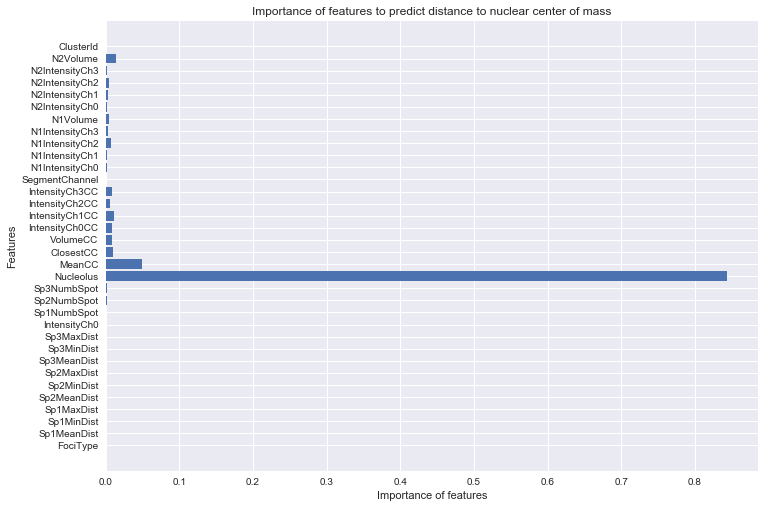

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.barh(range(len(Lab)), impFeatures, align="center")
plt.yticks(range(len(Lab)), Lab)

plt.xlabel("Importance of features")
plt.ylabel("Features")
plt.title("Importance of features to predict distance to nuclear center of mass")
plt.show()

In [56]:
predictionTest=regr.predict(TestSet[Lab])
predictionNeg=regr.predict(ControlNegative[Lab])

In [57]:
print("Accuracy score for segmented spots:")
print(regr.score(TestSet[Lab], TestSet["Nucleus"]))
print("Accuracy score for simulated spots:")
print(regr.score(ControlNegative[Lab], ControlNegative["Nucleus"]))

Accuracy score for segmented spots:
0.992547487382
Accuracy score for simulated spots:
0.957018833958


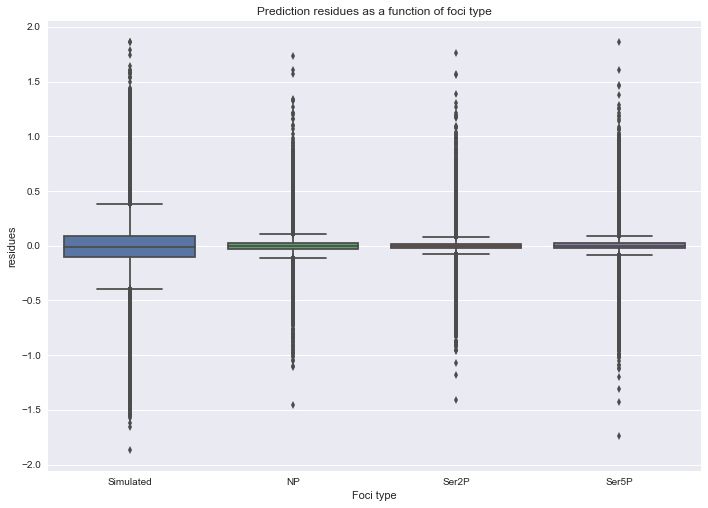

In [40]:
Pred=np.concatenate((np.array(predictionTest), np.array(predictionNeg)))
Obs=np.concatenate((np.array(TestSet["Nucleus"]), np.array(ControlNegative["Nucleus"])))
Foci=np.concatenate((np.array(TestSet["FociType"]), np.array(ControlNegative["FociType"])))
Res=Obs-Pred
df=pd.DataFrame({"Lab":Obs, "Pred":Pred, "Res":Res, "Foci": Foci})
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(df["Foci"], df["Res"])
plt.xlabel("Foci type")
ax.set_xticklabels(["Simulated","NP", "Ser2P", "Ser5P"])
plt.ylabel("residues")
plt.title("Prediction residues as a function of foci type")
plt.show()

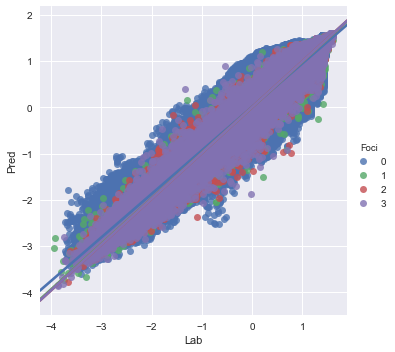

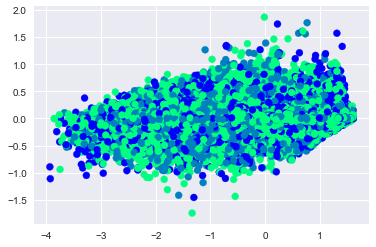

In [42]:
sns.lmplot("Lab","Pred",data=df, hue="Foci")
fig, ax = plt.subplots()
Res=np.array(TestSet["Nucleus"])-np.array(predictionTest)
ax.scatter(np.array(TestSet["Nucleus"]),Res, c=np.array(TestSet["FociType"]), cmap="winter")
#sns.lmplot("Res","Lab",data=df, hue="Foci")

# Conclusion
